<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220921_MNIST_%EC%8B%A4%EC%8A%B504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive /mydrive

In [ ]:
%cd /mydrive

/content/drive/MyDrive


In [ ]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


In [ ]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [ ]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __모델 변경__

---
Dropout 및 필터(노드) 수 조정 (32-0.5, 64-0.5, Flatten, 32-10)

필터 수, 층 수를 줄이고 Dropout 비율을 높여서 모델 규제를 강화함.

epoch=100 EarlyStop patient = 10
optimizer = 'rmsprop', 'adam'만 진행

#### __1. optimizer='rmsprop'__ 

In [ ]:
model_1_1 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(32, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model_1_1.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try04_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_1 = model_1_1.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
374/375 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.8883
Epoch 1: val_accuracy improved from -inf to 0.96800, saving model to mnist/try04_1.h5
375/375 [==============================] - 15s 8ms/step - loss: 0.5555 - accuracy: 0.8885 - val_loss: 0.1969 - val_accuracy: 0.9680
Epoch 2/100
366/375 [============================>.] - ETA: 0s - loss: 0.1407 - accuracy: 0.9659
Epoch 2: val_accuracy improved from 0.96800 to 0.97692, saving model to mnist/try04_1.h5
375/375 [==============================] - 2s 6ms/step - loss: 0.1400 - accuracy: 0.9660 - val_loss: 0.1084 - val_accuracy: 0.9769
Epoch 3/100
370/375 [============================>.] - ETA: 0s - loss: 0.0924 - accuracy: 0.9749
Epoch 3: val_accuracy improved from 0.97692 to 0.98158, saving model to mnist/try04_1.h5
375/375 [==============================] - 2s 7ms/step - loss: 0.0923 - accuracy: 0.9749 - val_loss: 0.0802 - val_accuracy: 0.9816
Epoch 4/100
374/375 [============================>.

In [ ]:
result = model_1_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9928

테스트 정확도: 0.9928


In [ ]:
loaded_model = load_model('mnist/try04_1.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9927

불러온 모델 테스트 정확도: 0.9927


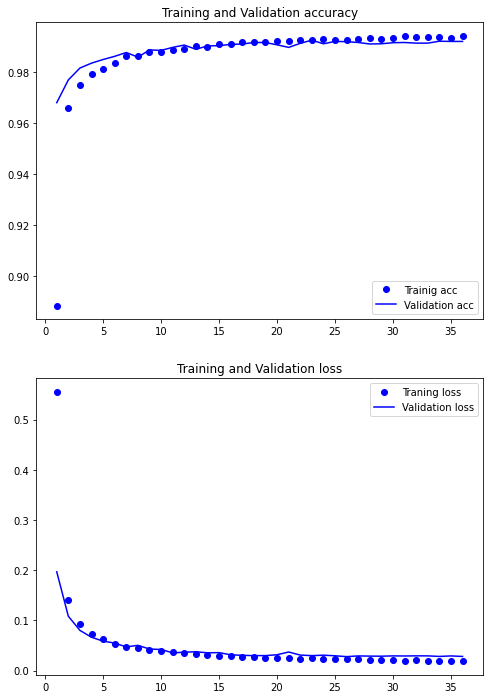

In [ ]:
acc = hist_1_1.history['accuracy']
val_acc = hist_1_1.history['val_accuracy']
loss = hist_1_1.history['loss']
val_loss = hist_1_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df = pd.DataFrame([['CNN', 'model_1_1', '32(relu/dropout0.5)-64(relu/drop0.5)-Flatten-32(sigmoid)-10(softmax)]', 'rmsprop', 100, 128, 0.2, 'es/mc', 
                    "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]],
                  columns=['모델', 'Name', 'Structure', 'Optimizer', 'epochs', 'batch_size', 'validation_split', 'callback', 'Accuracy', 'MC_Accuracy', 'Loss', 'MC_Loss'])

#### __2. optimizer='adam'__ 

In [ ]:
model_1_2 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(32, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
model_1_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try04_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_2 = model_1_2.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
366/375 [============================>.] - ETA: 0s - loss: 0.5698 - accuracy: 0.8840
Epoch 1: val_accuracy improved from -inf to 0.96583, saving model to mnist/try04_2.h5
375/375 [==============================] - 3s 7ms/step - loss: 0.5611 - accuracy: 0.8856 - val_loss: 0.2241 - val_accuracy: 0.9658
Epoch 2/100
370/375 [============================>.] - ETA: 0s - loss: 0.1596 - accuracy: 0.9658
Epoch 2: val_accuracy improved from 0.96583 to 0.97458, saving model to mnist/try04_2.h5
375/375 [==============================] - 2s 6ms/step - loss: 0.1593 - accuracy: 0.9659 - val_loss: 0.1285 - val_accuracy: 0.9746
Epoch 3/100
373/375 [============================>.] - ETA: 0s - loss: 0.1062 - accuracy: 0.9742
Epoch 3: val_accuracy improved from 0.97458 to 0.97917, saving model to mnist/try04_2.h5
375/375 [==============================] - 2s 6ms/step - loss: 0.1060 - accuracy: 0.9742 - val_loss: 0.0977 - val_accuracy: 0.9792
Epoch 4/100
372/375 [============================>.]

In [ ]:
result = model_1_2.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9925

테스트 정확도: 0.9925


In [ ]:
loaded_model = load_model('mnist/try04_2.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0230 - accuracy: 0.9933

불러온 모델 테스트 정확도: 0.9933


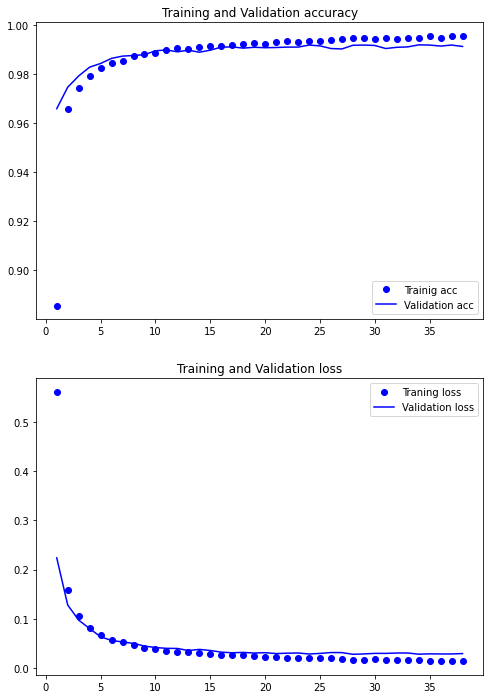

In [ ]:
acc = hist_1_2.history['accuracy']
val_acc = hist_1_2.history['val_accuracy']
loss = hist_1_2.history['loss']
val_loss = hist_1_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df.loc[1]=['CNN', 'model_1_1', '32(relu/dropout0.5)-64(relu/drop0.5)-Flatten-32(sigmoid)-10(softmax)]', 'adam', 100, 128, 0.2, 'es/mc', 
                    "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

In [ ]:
df.head()

,모델,Name,Structure,Optimizer,epochs,batch_size,validation_split,callback,Accuracy,MC_Accuracy,Loss,MC_Loss
0,CNN,model_1_1,32(relu/dropout0.5)-64(relu/drop0.5)-Flatten-3...,rmsprop,100,128,0.2,es/mc,0.9928,0.9927,0.0218,0.0222
1,CNN,model_1_1,32(relu/dropout0.5)-64(relu/drop0.5)-Flatten-3...,adam,100,128,0.2,es/mc,0.9925,0.9933,0.0239,0.0230


In [ ]:
df.to_csv("./mnist/220921_실습_4.csv", header=True, sep=',', na_rep='NaN', float_format = '%.4f', encoding='utf-8-sig', line_terminator='\n')